In [2]:
import pandas as pd

df = pd.read_csv("US_Accidents_March23.csv", nrows=100000)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            100000 non-null  object 
 11  Street                 100000 non-null  object 
 12  City                   99999 non-null   object 
 13  County                 100000 non-null  object 
 14  State                  100000 non-nul

In [4]:
df.isnull().sum().sort_values(ascending=False)

End_Lat                  100000
End_Lng                  100000
Wind_Chill(F)             95678
Precipitation(in)         92632
Wind_Speed(mph)           23820
Humidity(%)                1856
Visibility(mi)             1846
Weather_Condition          1604
Temperature(F)             1591
Pressure(in)               1292
Wind_Direction             1064
Weather_Timestamp          1054
Airport_Code                  7
Zipcode                       7
Timezone                      7
Sunrise_Sunset                1
Civil_Twilight                1
Nautical_Twilight             1
Astronomical_Twilight         1
City                          1
Country                       0
Junction                      0
Severity                      0
Start_Time                    0
End_Time                      0
Turning_Loop                  0
Traffic_Signal                0
Traffic_Calming               0
Stop                          0
Station                       0
Roundabout                    0
Railway 

In [5]:
use_cols = ['Start_Time', 'Start_Lat', 'Start_Lng', 'Weather_Condition',
            'Severity', 'Amenity', 'Bump', 'Crossing', 'Junction', 'Traffic_Signal']

df = df[use_cols]
df.head()

,Start_Time,Start_Lat,Start_Lng,Weather_Condition,Severity,Amenity,Bump,Crossing,Junction,Traffic_Signal
0,2016-02-08 05:46:00,39.865147,-84.058723,Light Rain,3,False,False,False,False,False
1,2016-02-08 06:07:59,39.928059,-82.831184,Light Rain,2,False,False,False,False,False
2,2016-02-08 06:49:27,39.063148,-84.032608,Overcast,2,False,False,False,False,True
3,2016-02-08 07:23:34,39.747753,-84.205582,Mostly Cloudy,3,False,False,False,False,False
4,2016-02-08 07:39:07,39.627781,-84.188354,Mostly Cloudy,2,False,False,False,False,True


In [6]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [7]:
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

In [8]:
df[['Start_Time', 'Hour', 'Weekday', 'Month']].head()

,Start_Time,Hour,Weekday,Month
0,2016-02-08 05:46:00,5,Monday,February
1,2016-02-08 06:07:59,6,Monday,February
2,2016-02-08 06:49:27,6,Monday,February
3,2016-02-08 07:23:34,7,Monday,February
4,2016-02-08 07:39:07,7,Monday,February


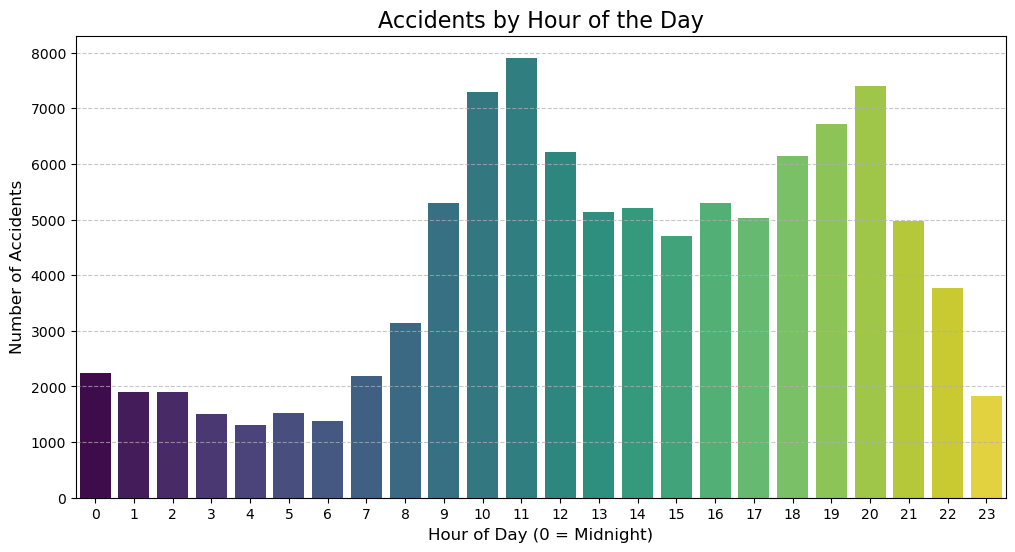

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Hour', hue='Hour', palette='viridis', legend=False)


plt.title("Accidents by Hour of the Day", fontsize=16)
plt.xlabel("Hour of Day (0 = Midnight)", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# 🔽 SAVE THE IMAGE (this line saves it as a PNG file)
plt.savefig("Accidents_by_Hour.png", dpi=300, bbox_inches='tight')
plt.show()

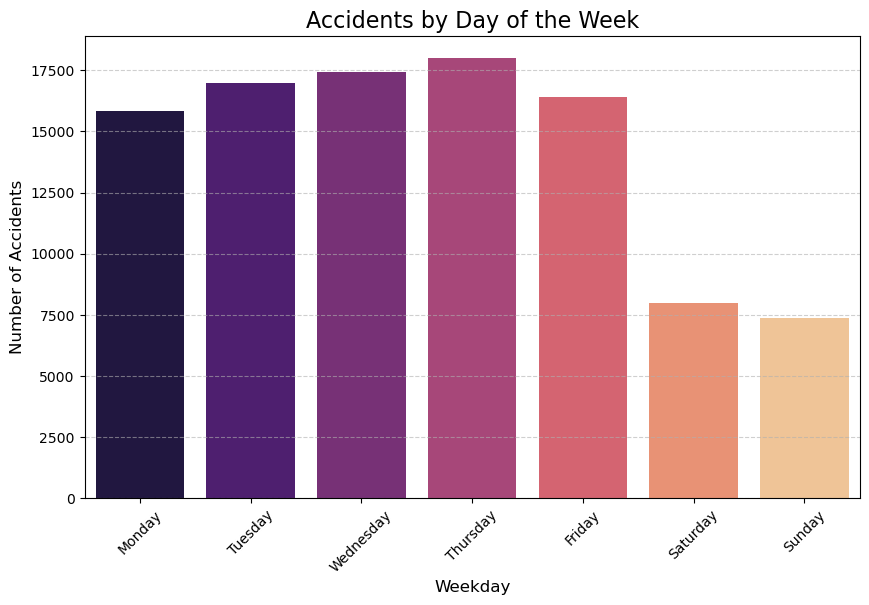

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Weekday', hue='Weekday', order=weekday_order, palette='magma', legend=False)

plt.title("Accidents by Day of the Week", fontsize=16)
plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.savefig("Accidents_by_Weekday.png")
plt.show()

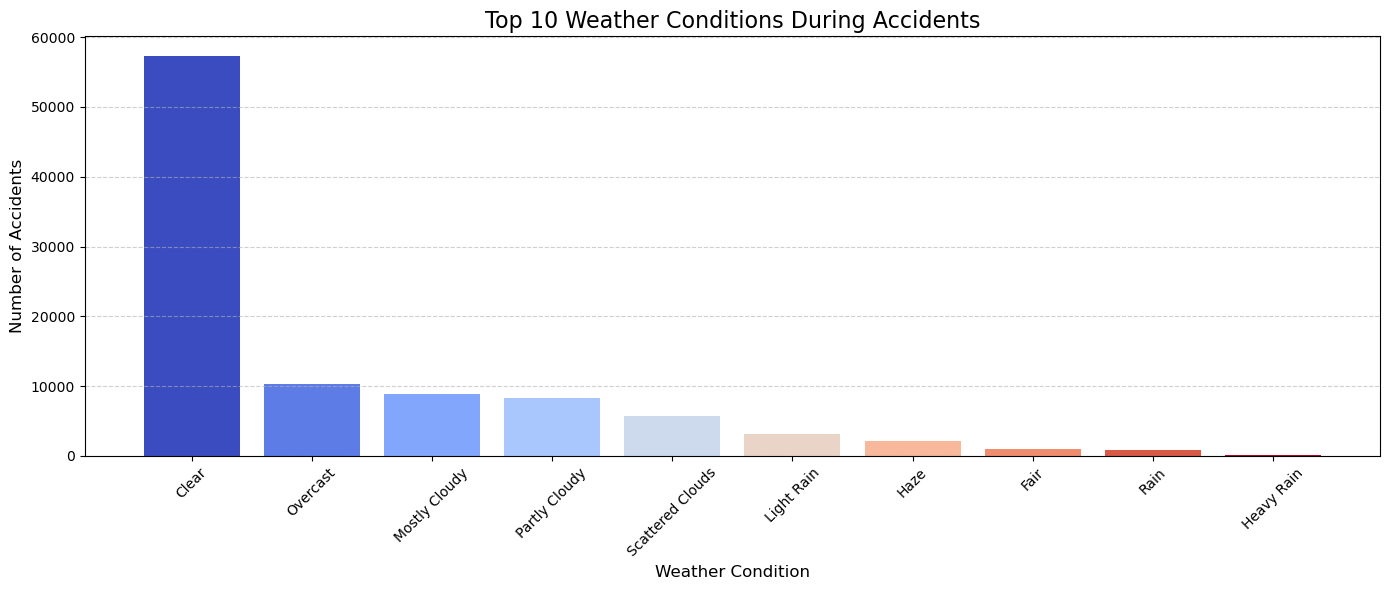

In [22]:
import numpy as np  # 👈 Add this import at the top if not already
import matplotlib.pyplot as plt

# Top 10 weather conditions
top_weather = df['Weather_Condition'].value_counts().nlargest(10)

# Plot with Matplotlib
plt.figure(figsize=(14,6))
plt.bar(top_weather.index, top_weather.values, color=plt.cm.coolwarm(np.linspace(0, 1, 10)))

plt.title("Top 10 Weather Conditions During Accidents", fontsize=16)
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("Top_Weather_Conditions.png")
plt.show()

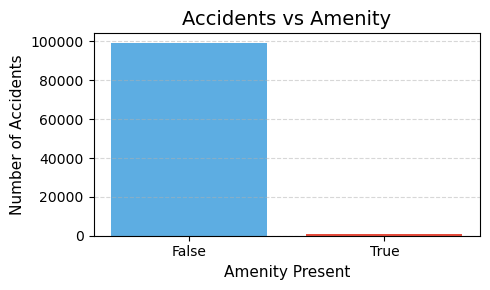

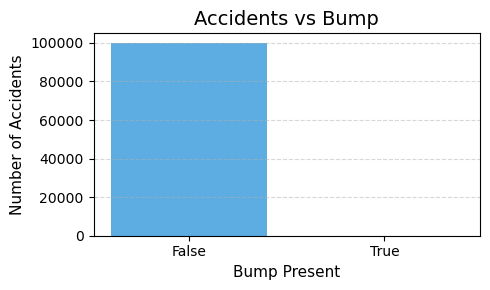

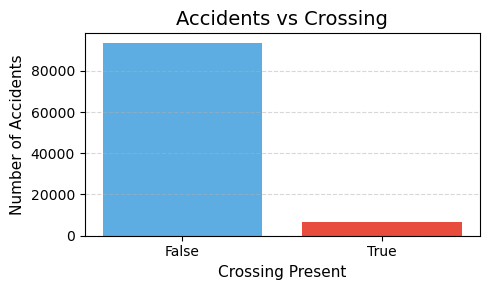

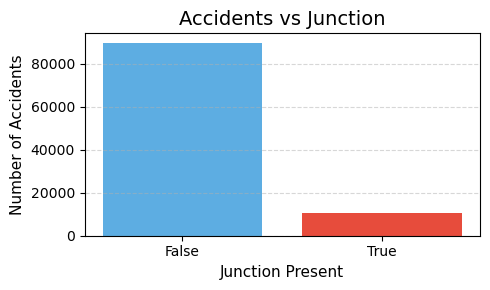

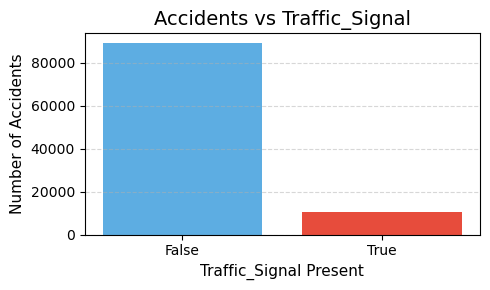

In [23]:
import matplotlib.pyplot as plt

road_features = ['Amenity', 'Bump', 'Crossing', 'Junction', 'Traffic_Signal']

for feature in road_features:
    counts = df[feature].value_counts()
    
    # Matplotlib plot
    plt.figure(figsize=(5,3))
    plt.bar(['False', 'True'], counts.sort_index().values, color=['#5DADE2', '#E74C3C'])
    
    plt.title(f'Accidents vs {feature}', fontsize=14)
    plt.xlabel(f'{feature} Present', fontsize=11)
    plt.ylabel('Number of Accidents', fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig("Road_Features_Bump.png")
    plt.show()

In [18]:
!pip install folium

In [19]:
import folium
from folium.plugins import HeatMap

# Sample data to avoid overloading
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(1000)

# Create base map centered around USA
map_us = folium.Map(location=[39.5, -98.35], zoom_start=4, tiles='CartoDB positron')

# Add heatmap layer
HeatMap(data=sample_df.values, radius=8, blur=4).add_to(map_us)

# Show map
map_us